# Auxiliary Functions

In [26]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path = '/home/bboattini/Documents/active_drop_potts_C'
items = os.listdir(path)

def a_from_file (File):
  fs = File.split("_")
  fl = len(fs)
  pad = float(fs[7].replace("", ""))
  return pad # return a value

def h_from_file (File):
  fs = File.split("_")
  fl = len(fs)
  pad = float(fs[9].replace("", ""))
  return pad # return h value

def state_from_file (File):
  fs = File.split("_")
  fl = len(fs)
  pad = fs[13].split("/")[1]
  return pad # return state value

def file_crawler():
    path = '/home/bboattini/Documents/Dados'
    items = os.listdir(path)

    configuration_files = []
    last_configuration_files = []
    measures_files = []
    general_data_files = []
    for item in items:
        full_item_path = os.path.join(path, item)
        if os.path.isdir(full_item_path):
            if 'dados_' in item:
                # List the files inside this directory
                files = os.listdir(full_item_path)
                #print(files)
                for File in files:
                    if 'conf.dsf' in File:
                        configuration_files.append(os.path.join(full_item_path, File))
                    elif 'LAST.dsf' in File:
                        last_configuration_files.append(os.path.join(full_item_path, File))
                    elif '0.00.dsf' in File:
                        measures_files.append(os.path.join(full_item_path, File))
                    elif '0.00.out' in File:
                        general_data_files.append(os.path.join(full_item_path, File))

    return {'config': configuration_files ,'last': last_configuration_files, 'measures': measures_files, 'general': general_data_files, }

# Center of Mass
Function that tests the new Center of Mass measure

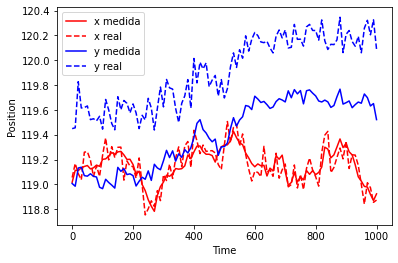

In [5]:
measures = file_crawler()['measures'][0]
t, V, Vw, Vo, E, bxw, byw, bxo,byo, rxw, ryw, rxo, ryo, txw, tyw,txo, tyo, npxw,npyw, npxo,npyo, vbw, vbo, vrw,vro, pw, po, fw, fo, vpw, vpo, xm_CM, ym_CM, zm_CM = np.loadtxt(measures, unpack=True)

for f in file_crawler()['config']:
    l = 240
    interface = pd.DataFrame()
    site, spin = np.loadtxt(f, skiprows = 21, unpack=True)
    interface["site"] = site
    interface["spin"] = spin

    x_values = []
    y_values = []
    x_CM = []
    y_CM = []

    # Iterate over rows
    for site, spin in interface.itertuples(index=False):
        if np.isnan(site):
            # Calculate mean and add to x_CM and y_CM
            if x_values and y_values:  # Check if lists are not empty
                x_CM.append(np.mean(x_values))
                y_CM.append(np.mean(y_values))
                x_values.clear()
                y_values.clear()
        else:
            # Calculate x and y and add to x_values and y_values
            x = site % l
            y = (site / l) % l
            x_values.append(x)
            y_values.append(y)

    # Check if there are remaining values after the loop
    if x_values and y_values:
        x_CM.append(np.mean(x_values))
        y_CM.append(np.mean(y_values))

# Plot xm_CM over time
plt.plot(t, xm_CM, 'r-', label='x medida')

# Plot x_CM over time with a dashed line
plt.plot(t, x_CM[1:], 'r--', label='x real')

# Plot xm_CM over time
plt.plot(t, ym_CM, 'b-', label='y medida')

# Plot x_CM over time with a dashed line
plt.plot(t, y_CM[1:], 'b--', label='y real')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()

# Display the plot
plt.show()

# Time Series
Show W and CB comparizon for a fixed **h** and **f**


Esses são as frações de óleo possiveis:
	0.00


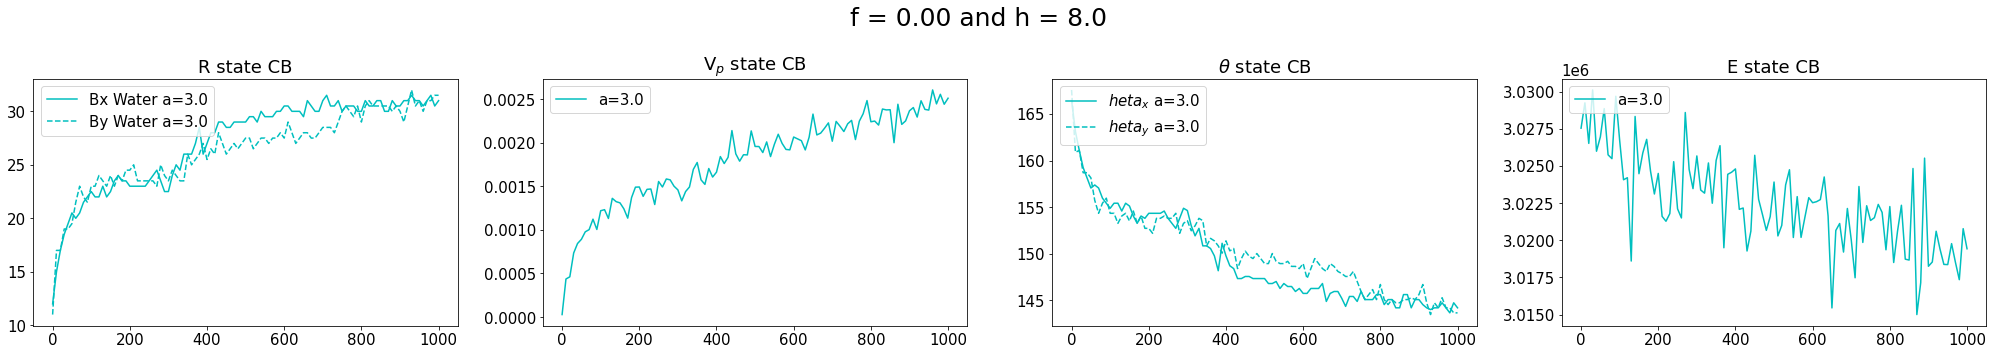

In [29]:
file_dict = file_crawler()['measures']

print("\nEsses são as frações de óleo possiveis:")
for lambs in file_dict:
  n = 0
  print(f'\t{lambs.split("_")[27].replace(".dsf", "")}')
  n += 1
lamb = input("Digite o valor desejado por inteiro:")

files_to_read = [f for f in file_dict if lamb in f]

#Inicia a figura
fig = plt.figure(figsize=(35,10))
h = h_from_file(files_to_read[0])
fig.suptitle('f = '+ lamb + ' and h = ' + str(h), fontsize=25)

plt.rcParams['font.size'] = '15'
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', '#FF5733', '#DAF7A6']
for f in files_to_read:
  #Loop de geração de gráficos
  t, V, Vw, Vo, E, bxw, byw, bxo,byo, rxw, ryw, rxo, ryo, txw, tyw,txo, tyo, npxw,npyw, npxo,npyo, vbw, vbo, vrw,vro, pw, po, fw, fo, vpw, vpo, xm_CM, ym_CM, zm_CM = np.loadtxt(f, unpack=True)
  
  state = state_from_file(f)
  N = 1
  if state == 'W':
    N = 5
  
  a = a_from_file(f)
  #================================GEOMETRIA================================
  plt.subplot(2,4,N)
  plt.plot(t ,bxw ,'-' ,c = colors[int(a)], label="Bx Water a="+str(a))
  plt.plot(t ,byw ,'--' ,c = colors[int(a)], label="By Water a="+str(a))
  plt.legend(loc="upper left")
  plt.title(f'R state {state_from_file(f)}')
  #================================VOLUME ABAIXO============================
  plt.subplot(2,4,N+1)
  plt.plot(t ,vbw ,'-' ,c = colors[int(a)], label="a="+str(a))
  plt.legend(loc="upper left")
  plt.title(r'V$_{p}$ state '+str(state_from_file(f)))
  #================================ANGULO================================
  plt.subplot(2,4,N+2)
  plt.plot(t ,txw ,'-' ,c = colors[int(a)], label="$\theta _x$ a="+str(a))
  plt.plot(t ,tyw ,'--' ,c = colors[int(a)], label="$\theta _y$ a="+str(a))
  plt.legend(loc="upper left")
  plt.title(r'$\theta$ state ' + str(state_from_file(f)))
  #================================ENERGIA================================
  plt.subplot(2,4,N+3)
  plt.plot(t,E,c = colors[int(a)], label="a="+str(a))
  plt.legend(loc="upper left")
  plt.title(f'E state {state_from_file(f)}')


fig.savefig(f"force{lamb}.png")